In [ ]:
# ============================
# 📌 Step 0: Upload File
# ============================
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()  # Ask for file upload

# Get the uploaded file name
image_path = list(uploaded.keys())[0]
print(f"Using file: {image_path}")

# ============================
# 📌 Step 1: Load and Display Original Image
# ============================
image = cv2.imread(image_path)        # Read image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for matplotlib

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# ============================
# 📌 Step 2: Convert to Grayscale
# ============================
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# ============================
# 📌 Step 3: Pixel Intensity Histogram
# ============================
plt.figure(figsize=(6,4))
plt.hist(gray_image.ravel(), bins=256, range=[0,256], color='gray')
plt.title("Pixel Intensity Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# ============================
# 📌 Step 4: Edge Detection (Canny)
# ============================
edges = cv2.Canny(gray_image, 100, 200)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis("off")
plt.show()
# ============================
# 📌 Step 5: Thresholding
# ============================
_, thresh = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")
plt.show()



UNIT-2

Saving dog-puppy-on-garden-royalty-free-image-1586966191.avif to dog-puppy-on-garden-royalty-free-image-1586966191.avif


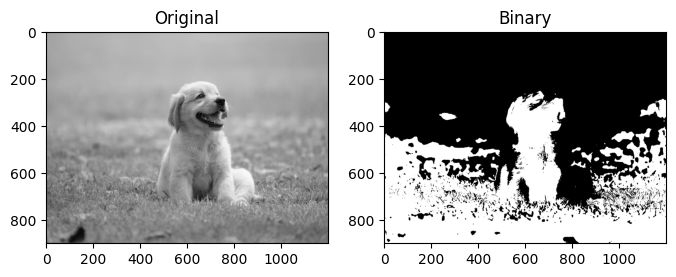

Detected 177 objects (excluding background)


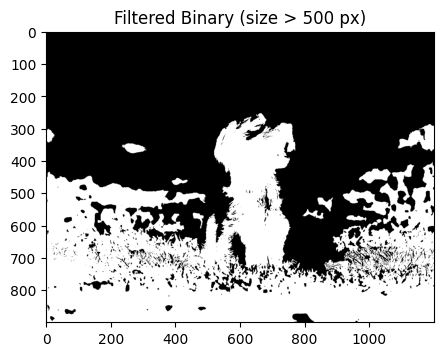

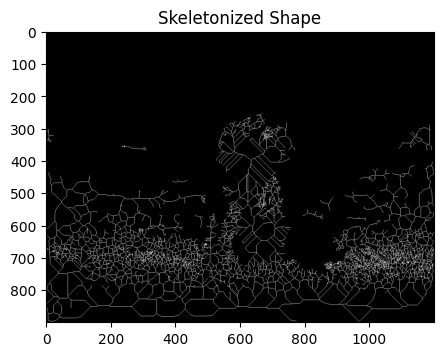

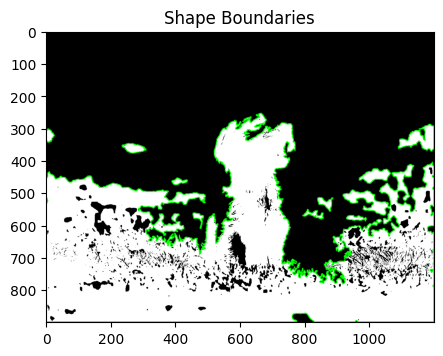

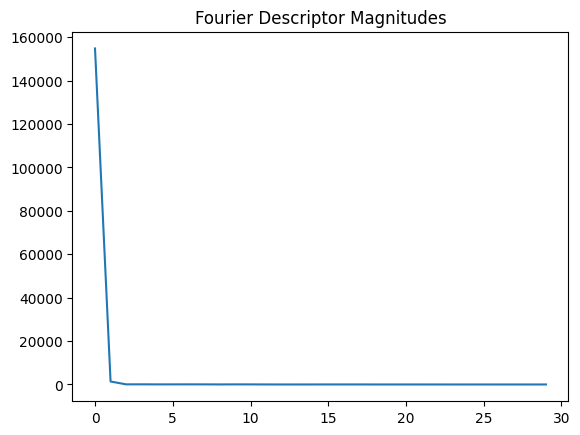

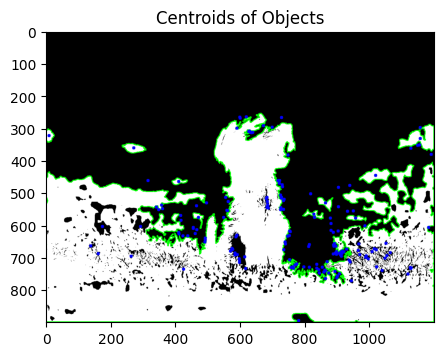

✅ Analysis complete. You can adjust min_size or contour index to explore more shapes.


In [1]:
# ================================================================
# 🧩 Binary Shape Analysis Demo
# Connected Components | Size Filtering | Skeletonization |
# Boundary Extraction | Fourier Descriptors
# ================================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from google.colab import files

# Step 1. Upload image
uploaded = files.upload()
filename = next(iter(uploaded))
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Step 2. Convert to binary
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary_inv = cv2.bitwise_not(binary)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("Binary")
plt.imshow(binary_inv, cmap='gray')
plt.show()

# Step 3. Connected Components (Object Labeling)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_inv, connectivity=8)
print(f"Detected {num_labels-1} objects (excluding background)")

# Step 4. Size Filtering (remove small blobs)
min_size = 500  # adjust as needed
filtered = np.zeros_like(labels, dtype=np.uint8)
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        filtered[labels == i] = 255

plt.figure(figsize=(5,5))
plt.title("Filtered Binary (size > 500 px)")
plt.imshow(filtered, cmap='gray')
plt.show()

# Step 5. Skeletonization
skeleton = skeletonize(filtered > 0)
plt.figure(figsize=(5,5))
plt.title("Skeletonized Shape")
plt.imshow(skeleton, cmap='gray')
plt.show()

# Step 6. Boundary Extraction
contours, _ = cv2.findContours(filtered, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img_boundary = cv2.cvtColor(filtered, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_boundary, contours, -1, (0,255,0), 2)
plt.figure(figsize=(5,5))
plt.title("Shape Boundaries")
plt.imshow(img_boundary)
plt.show()

# Step 7. Fourier Descriptors (for the first contour)
if contours:
    contour = contours[0][:, 0, :]  # simplify shape
    contour_complex = np.empty(contour.shape[:-1], dtype=complex)
    contour_complex.real = contour[:, 0]
    contour_complex.imag = contour[:, 1]

    # Compute Fourier Descriptors
    fourier_result = np.fft.fft(contour_complex)
    magnitude = np.abs(fourier_result[:30])  # take first 30 coefficients

    plt.figure()
    plt.title("Fourier Descriptor Magnitudes")
    plt.plot(magnitude)
    plt.show()


UNIT-3

Saving beautiful-female-eyes-wild-staring-looking-camera-32798733.webp to beautiful-female-eyes-wild-staring-looking-camera-32798733.webp


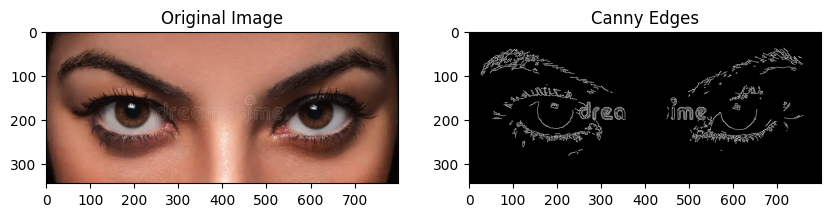

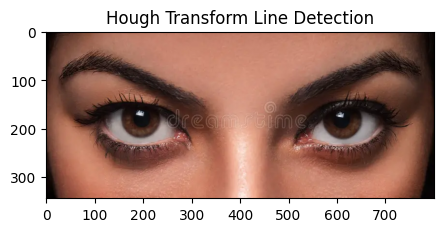

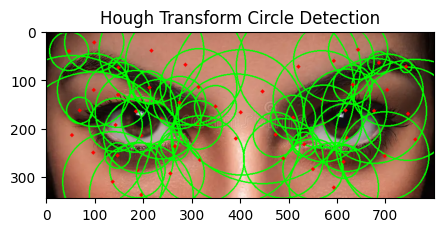

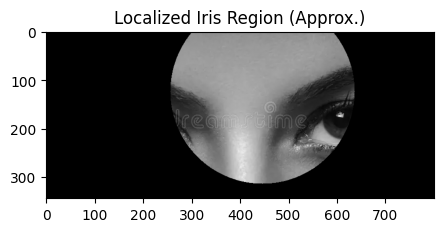

In [3]:
# ================================================================
# 🔍 Geometric Shape Detection Demo
# Line Detection | RANSAC Line Fitting | Circle & Ellipse Detection
# ================================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from skimage.measure import ransac, LineModelND, EllipseModel

# Step 1: Upload image
uploaded = files.upload()
filename = next(iter(uploaded))
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Edge Detection
edges = cv2.Canny(gray, 100, 200)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title("Original Image"); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2); plt.title("Canny Edges"); plt.imshow(edges, cmap='gray')
plt.show()

# ================================================================
# 🧩 1. Line Detection using Hough Transform
# ================================================================
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=120)
img_lines = img.copy()

if lines is not None:
    for rho, theta in lines[:,0]:
        a = np.cos(theta); b = np.sin(theta)
        x0, y0 = a*rho, b*rho
        x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
        x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
        cv2.line(img_lines, (x1,y1), (x2,y2), (0,255,0), 2)

plt.figure(figsize=(5,5))
plt.title("Hough Transform Line Detection")
plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
plt.show()

# ================================================================
# 🎯 2. Circle Detection using Hough Transform
# ================================================================
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2,
                           minDist=50, param1=100, param2=40,
                           minRadius=10, maxRadius=200)
img_circles = img.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(img_circles, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img_circles, (x, y), 2, (0, 0, 255), 3)

plt.figure(figsize=(5,5))
plt.title("Hough Transform Circle Detection")
plt.imshow(cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB))
plt.show()

# ================================================================
# 👁️ 4. Iris-like Circular Object Localization (Case Study)
# ================================================================
if circles is not None:
    largest_circle = max(circles[0, :], key=lambda c: c[2])
    (cx, cy, r) = largest_circle
    iris_mask = np.zeros_like(gray)
    cv2.circle(iris_mask, (cx, cy), r, 255, -1)
    iris_region = cv2.bitwise_and(gray, gray, mask=iris_mask)

    plt.figure(figsize=(5,5))
    plt.title("Localized Iris Region (Approx.)")
    plt.imshow(iris_region, cmap='gray')
    plt.show()



UNIT-4

Upload ONE color image (for shape-from-shading) or TWO stereo color images (for 3D depth).


Saving frame2.png to frame2 (5).png
Saving frame1.png to frame1 (8).png


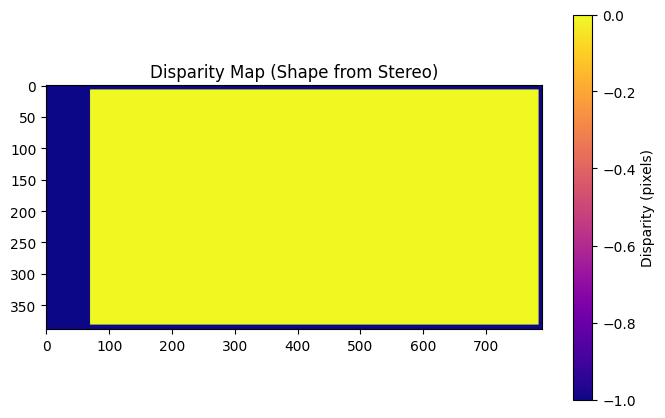

3D points generated: 266662


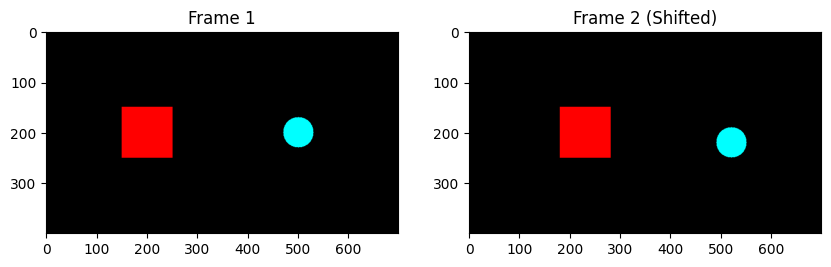

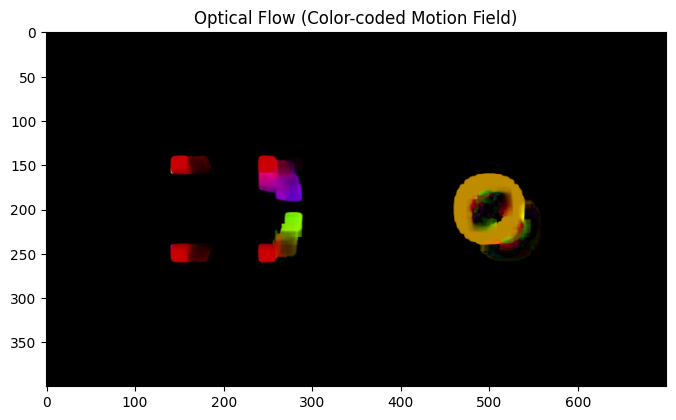

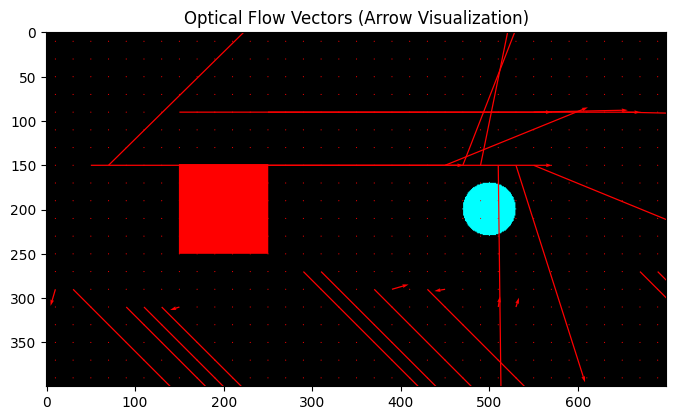

✅ Optical flow demo completed successfully.


In [9]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

# Step 1. Upload one or two color images
print("Upload ONE color image (for shape-from-shading) or TWO stereo color images (for 3D depth).")
uploaded = files.upload()
filenames = list(uploaded.keys())

# Load images in color
imgs_color = [cv2.imread(f) for f in filenames]
imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs_color]

if len(imgs_color) == 1:
    img_color = imgs_color[0]
    img_gray = imgs_gray[0]
else:
    imgL_color, imgR_color = imgs_color[:2]
    imgL_gray, imgR_gray = imgs_gray[:2]

# ================================================================
# 🧩 1. Shape-from-Shading (from single color image)
# ================================================================
if len(imgs_color) == 1:
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
    intensity = img_gray.astype(np.float32) / 255.0
    depth = cv2.GaussianBlur(intensity - 0.5 * (np.abs(sobelx) + np.abs(sobely)), (5,5), 0)

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.arange(depth.shape[1]), np.arange(depth.shape[0]))
    ax.plot_surface(X, Y, depth, cmap='viridis')
    plt.title("Shape-from-Shading (Approximate 3D Surface)")
    plt.show()

# ================================================================
# 🧭 2. Stereo Depth Map (Shape from Stereo)
# ================================================================
if len(imgs_color) >= 2:
    stereo = cv2.StereoBM_create(numDisparities=64, blockSize=15)
    disparity = stereo.compute(imgL_gray, imgR_gray).astype(np.float32) / 16.0

    plt.figure(figsize=(8,5))
    plt.title("Disparity Map (Shape from Stereo)")
    plt.imshow(disparity, cmap='plasma')
    plt.colorbar(label='Disparity (pixels)')
    plt.show()

    # Simple 3D point reconstruction (projection scheme)
    h, w = imgL_gray.shape
    f = 0.8 * w
    Q = np.float32([[1, 0, 0, -w/2],
                    [0, -1, 0, h/2],
                    [0, 0, 0, -f],
                    [0, 0, 1, 0]])
    points_3D = cv2.reprojectImageTo3D(disparity, Q)
    mask = disparity > disparity.min()
    output_points = points_3D[mask]
    print(f"3D points generated: {len(output_points)}")

# ================================================================
# 🎬 3. Motion Analysis via Optical Flow
# ================================================================
h, w = 400, 700
frame1 = np.zeros((h, w, 3), dtype=np.uint8)
frame2 = np.zeros((h, w, 3), dtype=np.uint8)

# Moving red square (shifted to the right)
cv2.rectangle(frame1, (150,150), (250,250), (0,0,255), -1)
cv2.rectangle(frame2, (180,150), (280,250), (0,0,255), -1)

# Optional: draw extra shapes to make motion field richer
cv2.circle(frame1, (500, 200), 30, (255, 255, 0), -1)
cv2.circle(frame2, (520, 220), 30, (255, 255, 0), -1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title("Frame 1"); plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2); plt.title("Frame 2 (Shifted)"); plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.show()

# --- 2. Compute optical flow between frames ---
frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(
    frame1_gray, frame2_gray, None,
    pyr_scale=0.5, levels=3, winsize=15,
    iterations=3, poly_n=5, poly_sigma=1.2, flags=0
)

# --- 3. Color-coded optical flow visualization ---
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv = np.zeros_like(frame1)
hsv[...,0] = ang * 180 / np.pi / 2     # direction → hue
hsv[...,1] = 255                       # saturation
hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)  # magnitude → value
flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(8,5))
plt.title("Optical Flow (Color-coded Motion Field)")
plt.imshow(flow_rgb)
plt.show()

# --- 4. Overlay motion vectors (arrows) on top of the first frame ---
step = 20  # grid spacing
h, w = frame1_gray.shape
y, x = np.mgrid[step/2:h:step, step/2:w:step].astype(int)
fx, fy = flow[y, x].T

plt.figure(figsize=(8,5))
plt.title("Optical Flow Vectors (Arrow Visualization)")
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.quiver(x, y, fx, -fy, color='r', scale=50, width=0.002)
plt.show()

print("✅ Optical flow demo completed successfully.")

UNIT-5

Upload a road image (e.g., highway or street view).


Saving lane.jpg to lane (2).jpg


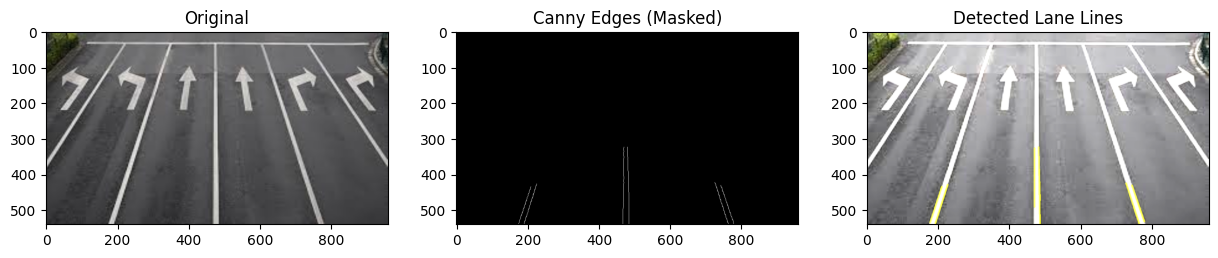

✅ Lane detection completed.


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1. Upload a road image
print("Upload a road image (e.g., highway or street view).")
uploaded = files.upload()
filename = next(iter(uploaded))

# Step 2. Load and preprocess
img = cv2.imread(filename)
if img is None:
    raise ValueError("Could not load image!")

# Resize for display convenience
img = cv2.resize(img, (960, 540))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Step 3. Edge detection
edges = cv2.Canny(blur, 50, 150)

# Step 4. Mask region of interest (triangular area of road)
mask = np.zeros_like(edges)
height, width = edges.shape
polygon = np.array([[
    (0, height),
    (width, height),
    (int(width*0.55), int(height*0.6)),
    (int(width*0.45), int(height*0.6))
]])
cv2.fillPoly(mask, polygon, 255)
masked_edges = cv2.bitwise_and(edges, mask)

# Step 5. Detect lines using Hough Transform
lines = cv2.HoughLinesP(masked_edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=150)

lane_image = img.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lane_image, (x1, y1), (x2, y2), (0, 255, 255), 4)

# Step 6. Overlay detected lanes
output = cv2.addWeighted(img, 0.8, lane_image, 1, 1)

# Step 7. Display results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.title("Original"); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2); plt.title("Canny Edges (Masked)"); plt.imshow(masked_edges, cmap='gray')
plt.subplot(1,3,3); plt.title("Detected Lane Lines"); plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

print("✅ Lane detection completed.")
